In [26]:
%matplotlib widget
import numpy as np
import pandas as pd
import os
import mne
from mne.preprocessing import ICA

# Playground

In [27]:
channels = ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']

In [28]:
labels_path = 'GameLabels\GAMEEMO_SCORES.xlsx'
labels_sheet = 'All'

In [29]:
labels = pd.read_excel(labels_path, labels_sheet)
labels

Subject  Boring  Horrible  Calm  Funny
0          1       8         1     3      2
1          1       2         1     8      8
2          1       2         8     1      1
3          1       1         1     3      9
4          2       8         1     4      2
..       ...     ...       ...   ...    ...
107       27       1         1     7      5
108       28       7         1     6      1
109       28       1         1     8      8
110       28       1         7     6      1
111       28       1         1     7      7

[112 rows x 5 columns]

In [80]:
data_folder = 'GAMEEMO_database'
eeg_data_csv = os.listdir(data_folder)[1]

In [81]:
data = pd.read_csv(os.path.join(data_folder, eeg_data_csv))

In [82]:
signal = data[channels].T
signal = signal
signal.head()

0        1        2        3        4        5         6        7      \
AF3  46.5180  40.8347  24.2846   8.7275  16.8805  29.8472  14.55900  10.0703   
AF4   9.3999  22.9359  35.6597  33.5203  18.9758  15.4269   8.71670  22.2937   
F3   48.4461  59.6394  56.1814  59.0775  56.0150  49.2794  38.60990  50.3933   
F4  -38.8052 -22.3769  -6.9343   4.0870   5.2878   3.5245 -10.78700  -6.8858   
F7  -28.2001 -12.4081   2.4364  -1.0841  -1.0189   2.4165  -0.62079   7.3702   

       8        9      ...     38242   38243     38244     38245    38246  \
AF3  12.5992  -2.2567  ...  -0.14259  7.8196   0.84293  -0.41294  4.19150   
AF4  21.3176   6.5411  ... -10.88490  3.8682  17.73610   2.69230 -3.97680   
F3   51.5876  34.3924  ...  -9.37390  3.4810  15.08220  15.38260  0.35964   
F4    6.7836   8.3049  ... -11.14190  3.6266  17.50900  13.08440 -1.80070   
F7   -7.1720 -10.2364  ... -17.21900 -2.0858  12.13930   9.96480 -4.73310   

        38247    38248    38249    38250     38251  
AF3   1.52970  5.05340   4.2682  18.1121  14.73580  
AF4  -0.36388  9.53990  14.2701  17.7525   6.32350  
F3  -13.76190 -0.64393  13.4947  15.9390   0.88265  
F4  -15.79260 -0.74508  13.3996  22.2366   6.80240  
F7   -8.42620  6.17940  19.9086  22.0886   7.98900  

[5 rows x 38252 columns]

In [83]:
channel_means = signal.mean(axis=0)
print(channel_means.shape)
# Apply average reference by subtracting the mean of all channels from each channel
signal_avg_ref = signal.sub(channel_means, axis=1)
signal_avg_ref.head()

(38252,)


0          1          2          3          4         5      \
AF3  39.390586  29.116386  13.114443  -0.016436   8.179135  16.70115   
AF4   2.272486  11.217586  24.489543  24.776364  10.274435   2.28085   
F3   41.318686  47.921086  45.011243  50.333564  47.313635  36.13335   
F4  -45.932614 -34.095214 -18.104457  -4.656936  -3.413565  -9.62155   
F7  -35.327514 -24.126414  -8.733757  -9.828036  -9.720265 -10.72955   

         6          7          8          9      ...      38242     38243  \
AF3   7.357885   1.192226   2.532336  -6.081329  ...   3.244669  6.449986   
AF4   1.515585  13.415626  11.250736   2.716471  ...  -7.497641  2.498586   
F3   31.408785  41.515226  41.520736  30.567771  ...  -5.986641  2.111386   
F4  -17.988115 -15.763874  -3.283264   4.480271  ...  -7.754641  2.256986   
F7   -7.821905  -1.507874 -17.238864 -14.061029  ... -13.831741 -3.455414   

         38244      38245     38246     38247     38248      38249      38250  \
AF3  -5.084229  -0.957408  8.784256  8.498141  4.364396  -0.304754  10.551012   
AF4  11.808941   2.147832  0.615956  6.604561  8.850896   9.697146  10.191412   
F3    9.155041  14.838132  4.952396 -6.793459 -1.332934   8.921746   8.377912   
F4   11.581841  12.539932  2.792056 -8.824159 -1.434084   8.826646  14.675512   
F7    6.212141   9.420332 -0.140344 -1.457759  5.490396  15.335646  14.527512   

         38251  
AF3  14.282364  
AF4   5.870064  
F3    0.429214  
F4    6.348964  
F7    7.535564  

[5 rows x 38252 columns]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


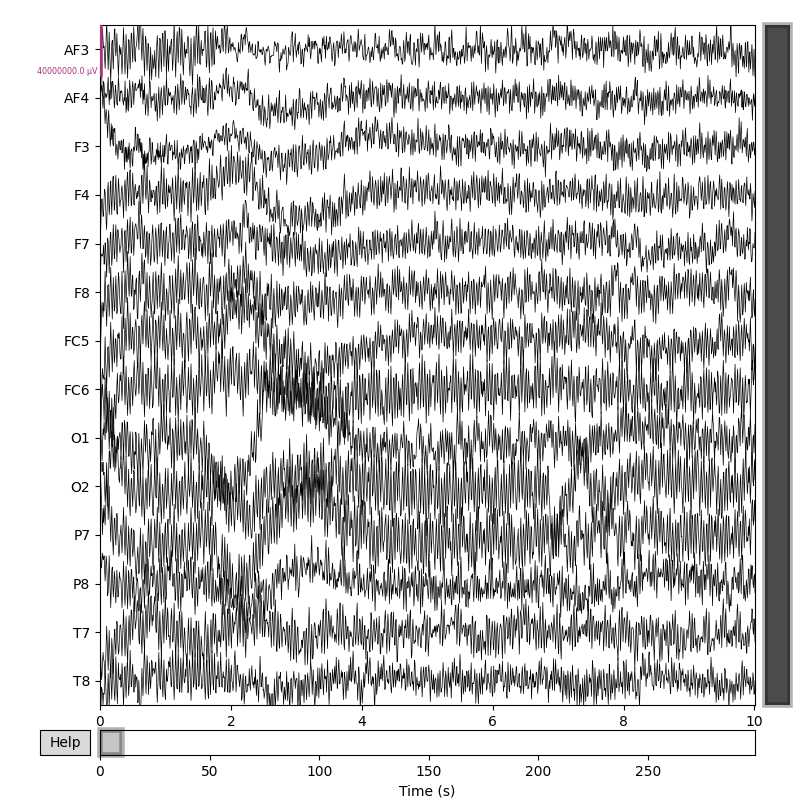

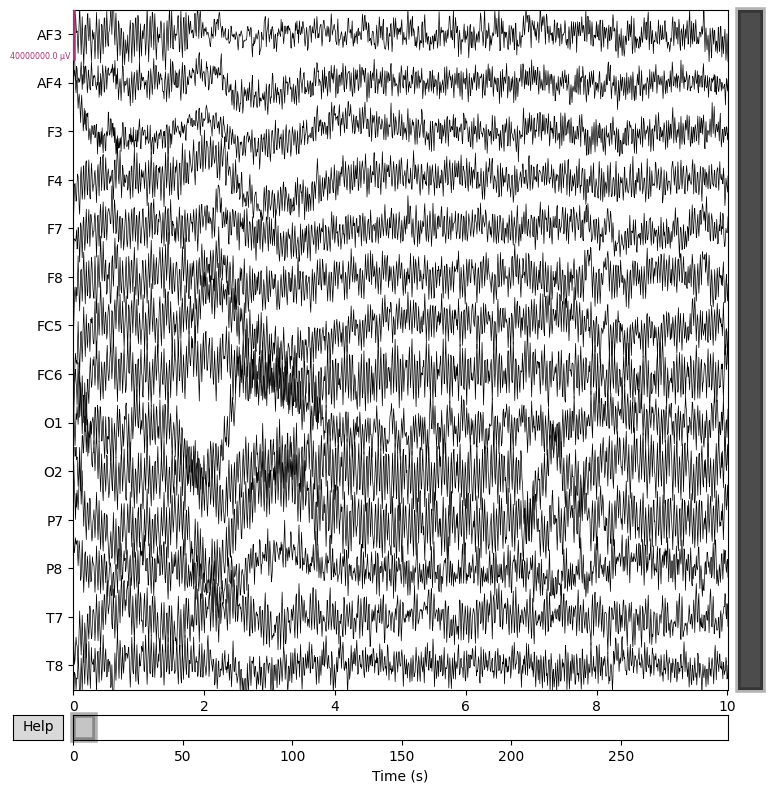

In [84]:
ch_names = channels  # Channel names from the columns
sfreq = 128  # Sampling frequency, adjust according to your data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

# raw = mne.io.RawArray(signal, info)
raw = mne.io.RawArray(signal_avg_ref, info)

raw.plot(scalings={'eeg': 2e1}, show=True, block=False)

# raw.save('eeg_data_raw.fif', overwrite=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)



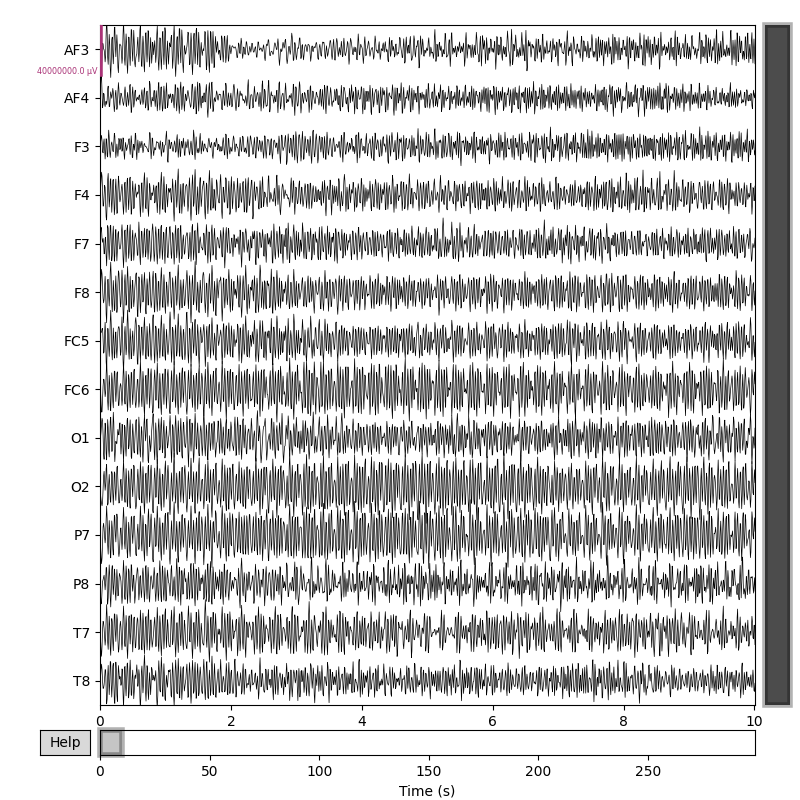

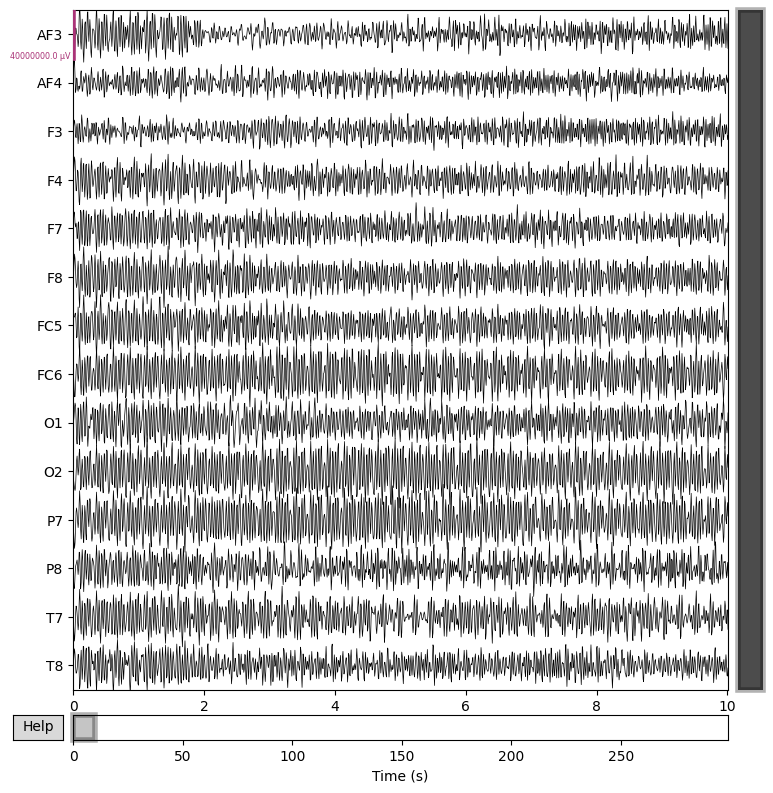

In [85]:
raw.filter(8., 31., fir_design='firwin', picks='all')
raw.plot(scalings={'eeg': 2e1}, show=True, block=False)

# raw.filter(
#     l_freq=0.5, 
#     h_freq=50,
#     picks='eeg',
#     filter_length='10s',
#     l_trans_bandwidth='auto',
#     h_trans_bandwidth='auto',
#     n_jobs=1,
#     method='fir',
#     iir_params=None,
#     phase='zero',
#     fir_window='hamming',
#     fir_design='firwin',
#     pad='reflect_limited',
#     skip_by_annotation=['edge', 'bad_acq_skip'],
#     verbose=True
# )

In [86]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F3, F4, F7, F8, FC5, FC6, O1, O2, P7, P8, T7, T8
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 31.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
>

In [87]:
# Initialize ICA
ica = ICA(n_components=14, random_state=97, max_iter=500)

# Fit ICA to the filtered raw data
ica.fit(raw)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 1.1s.


C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\225400958.py:5: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (9) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


<ICA | raw data decomposition, method: fastica (fit in 98 iterations on 38252 samples), 14 ICA components (14 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


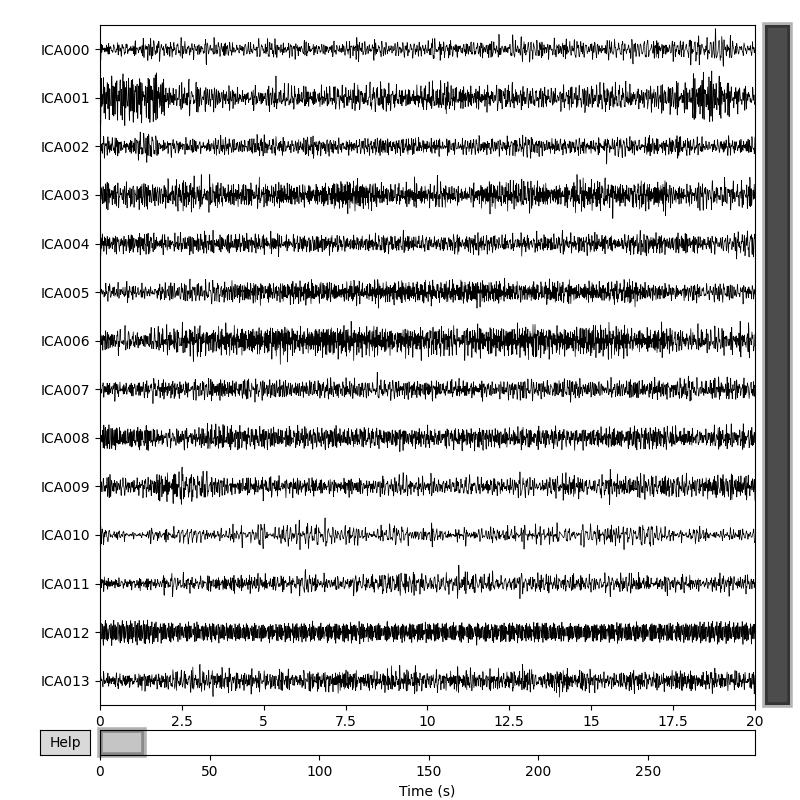

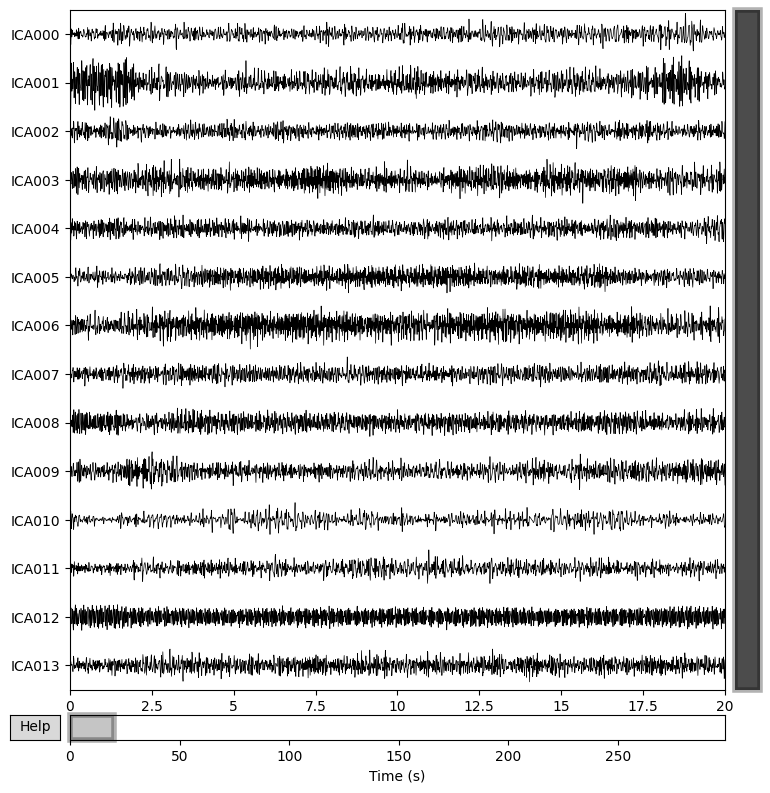

In [88]:
# Optionally, manually inspect components
ica.plot_sources(raw, show_scrollbars=True)

In [89]:
# ica.exclude = [2, 13]

In [90]:
# Apply ICA to remove the artifact components
raw_corrected = ica.apply(raw)

# Save ICA solution
# ica.save('my_ica_solution.fif')

# Optionally, load and apply the saved ICA solution
# ica = mne.preprocessing.read_ica('my_ica_solution.fif')
# raw_corrected = ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components


In [91]:
# Define events (for simplicity, creating synthetic events)
# events = mne.make_fixed_length_events(raw_clean, id=1, start=0, duration=2.0)  # 2-second epochs
events = mne.make_fixed_length_events(raw, id=1, start=0, duration=5.0)  # 2-second epochs

# Create epochs
# epochs = mne.Epochs(raw_clean, events, tmin=0.0, tmax=2.0, baseline=None)
epochs = mne.Epochs(raw, events, tmin=0.0, tmax=5.0, baseline=None)

# Convert epochs to numpy array
epochs_data = epochs.get_data()  # shape (n_epochs, n_channels, n_times)


Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped


Using data from preloaded Raw for 20 events and 641 original time points ...


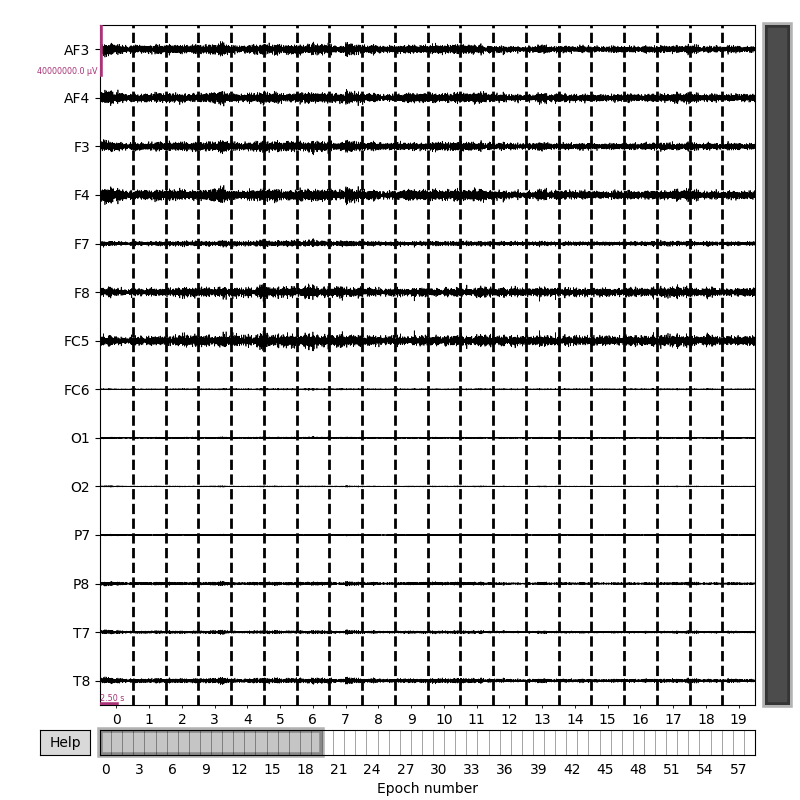

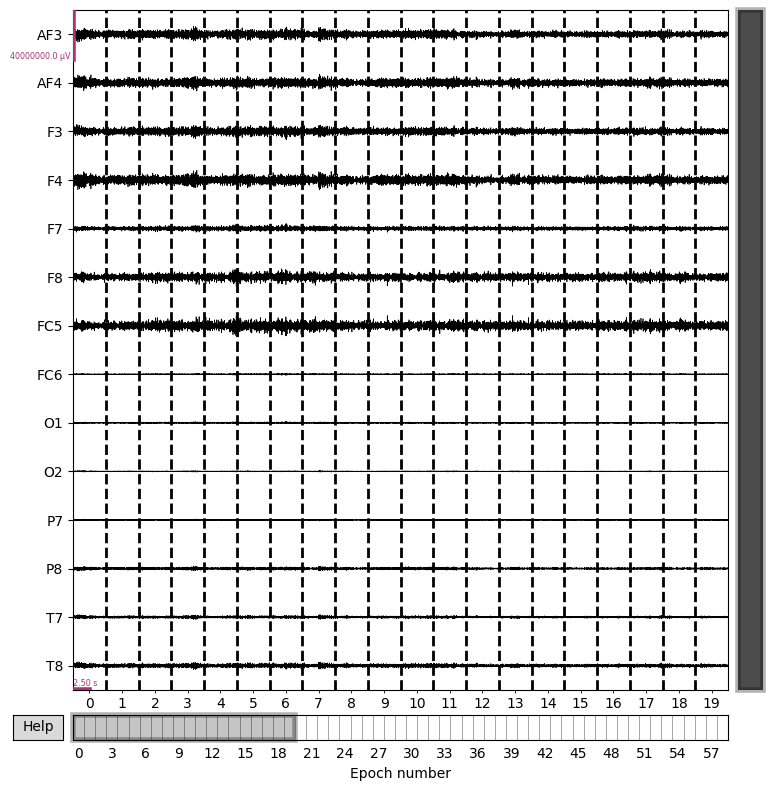

In [93]:
epochs.plot(picks='all',  scalings={'eeg': 2e1}, show=True, block=False)

In [14]:
# Extract data from epochs
data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)

# Get channel names and times
ch_names = epochs.ch_names
times = epochs.times
print(data.shape, ch_names, times.shape)

Using data from preloaded Raw for 59 events and 641 original time points ...
(59, 14, 641) ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8'] (641,)


In [67]:
# Iterate over epochs to save each as a CSV file
save_folder = 'sample_save'
for i in range(data.shape[0]):
    # Create a DataFrame for each epoch
    df = pd.DataFrame(data[i].T, columns=ch_names)
    df['time'] = times
    
    # Save the DataFrame to a CSV file
    filename = f'epoch_{i}.csv'
    path = os.path.join(save_folder, filename)
    df.to_csv(path, index=False)
    
    print(f"Saved {filename}")


Saved epoch_0.csv
Saved epoch_1.csv
Saved epoch_2.csv
Saved epoch_3.csv
Saved epoch_4.csv
Saved epoch_5.csv
Saved epoch_6.csv
Saved epoch_7.csv
Saved epoch_8.csv
Saved epoch_9.csv
Saved epoch_10.csv
Saved epoch_11.csv
Saved epoch_12.csv
Saved epoch_13.csv
Saved epoch_14.csv
Saved epoch_15.csv
Saved epoch_16.csv
Saved epoch_17.csv
Saved epoch_18.csv
Saved epoch_19.csv
Saved epoch_20.csv
Saved epoch_21.csv
Saved epoch_22.csv
Saved epoch_23.csv
Saved epoch_24.csv
Saved epoch_25.csv
Saved epoch_26.csv
Saved epoch_27.csv
Saved epoch_28.csv
Saved epoch_29.csv
Saved epoch_30.csv
Saved epoch_31.csv
Saved epoch_32.csv
Saved epoch_33.csv
Saved epoch_34.csv
Saved epoch_35.csv
Saved epoch_36.csv
Saved epoch_37.csv
Saved epoch_38.csv
Saved epoch_39.csv
Saved epoch_40.csv
Saved epoch_41.csv
Saved epoch_42.csv
Saved epoch_43.csv
Saved epoch_44.csv
Saved epoch_45.csv
Saved epoch_46.csv
Saved epoch_47.csv
Saved epoch_48.csv
Saved epoch_49.csv
Saved epoch_50.csv
Saved epoch_51.csv
Saved epoch_52.csv
Sav

In [14]:
import scipy.signal as signal

def compute_psd(epochs_data, sfreq):
    psd_features = []
    for epoch in epochs_data:
        epoch_psd = []
        for channel in epoch:
            freqs, psd = signal.welch(channel, sfreq, nperseg=256)
            epoch_psd.append(psd)
        psd_features.append(epoch_psd)
    return np.array(psd_features)

psd_features = compute_psd(epochs_data, sfreq)


In [15]:
psd_features.shape

(59, 14, 129)

# Data Formatting

In [96]:
from tqdm import tqdm

In [104]:
epochs_folder = 'gameemo_database_epochs'
epochs_psd_folder = 'gameemo_database_epochs_psd'
epochs_ica_folder = 'gameemo_database_epochs_ica'
current_dir = epochs_ica_folder 
subjects = os.listdir(epochs_folder)

games = os.listdir(os.path.join(epochs_folder, subjects[0]))

print(subjects, games)

['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28'] ['G1', 'G2', 'G3', 'G4']


In [98]:
ch_names = channels  
sfreq = 128  

In [99]:
epochs_collect = []
for folder in tqdm(os.listdir(data_folder)):
    # print(folder)
    data = pd.read_csv(os.path.join(data_folder, folder))
    signal = data[channels].T

    channel_means = signal.mean(axis=0)
    signal_avg_ref = signal.sub(channel_means, axis=1)

    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw_array = mne.io.RawArray(signal_avg_ref, info)

    raw_filtered = raw_array.filter(8., 31., fir_design='firwin', picks='all')
    
    events = mne.make_fixed_length_events(raw_filtered, id=1, start=0, duration=5.0)  
    epochs = mne.Epochs(raw_filtered, events, tmin=0.0, tmax=5.0, baseline=None)
    epochs_collect.append(epochs)

  0%|                                                                                          | 0/112 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  1%|▋                                                                                 | 1/112 [00:00<00:17,  6.31it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  2%|█▍                                                                                | 2/112 [00:00<00:16,  6.55it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  3%|██▏                                                                               | 3/112 [00:00<00:16,  6.77it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  4%|██▉                                                                               | 4/112 [00:00<00:15,  6.85it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  4%|███▋                                                                              | 5/112 [00:00<00:15,  6.94it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  5%|████▍                                                                             | 6/112 [00:00<00:15,  7.01it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  6%|█████▏                                                                            | 7/112 [00:01<00:15,  6.98it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  7%|█████▊                                                                            | 8/112 [00:01<00:15,  6.74it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  8%|██████▌                                                                           | 9/112 [00:01<00:15,  6.79it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


  9%|███████▏                                                                         | 10/112 [00:01<00:15,  6.56it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 10%|███████▉                                                                         | 11/112 [00:01<00:16,  6.31it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 11%|████████▋                                                                        | 12/112 [00:01<00:16,  6.19it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 12%|█████████▍                                                                       | 13/112 [00:02<00:18,  5.49it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 12%|██████████▏                                                                      | 14/112 [00:02<00:16,  5.88it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 13%|██████████▊                                                                      | 15/112 [00:02<00:15,  6.12it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 14%|███████████▌                                                                     | 16/112 [00:02<00:15,  6.08it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 15%|████████████▎                                                                    | 17/112 [00:02<00:16,  5.87it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 16%|█████████████                                                                    | 18/112 [00:02<00:15,  6.05it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 17%|█████████████▋                                                                   | 19/112 [00:02<00:14,  6.30it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 18%|██████████████▍                                                                  | 20/112 [00:03<00:13,  6.57it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 19%|███████████████▏                                                                 | 21/112 [00:03<00:13,  6.86it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 20%|███████████████▉                                                                 | 22/112 [00:03<00:12,  7.01it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 21%|████████████████▋                                                                | 23/112 [00:03<00:12,  7.08it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 21%|█████████████████▎                                                               | 24/112 [00:03<00:13,  6.73it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 22%|██████████████████                                                               | 25/112 [00:03<00:12,  7.02it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 23%|██████████████████▊                                                              | 26/112 [00:03<00:12,  6.99it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 24%|███████████████████▌                                                             | 27/112 [00:04<00:12,  7.02it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 25%|████████████████████▎                                                            | 28/112 [00:04<00:11,  7.08it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 26%|████████████████████▉                                                            | 29/112 [00:04<00:11,  7.18it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 27%|█████████████████████▋                                                           | 30/112 [00:04<00:11,  7.30it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 28%|██████████████████████▍                                                          | 31/112 [00:04<00:11,  7.18it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 29%|███████████████████████▏                                                         | 32/112 [00:04<00:11,  6.86it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 29%|███████████████████████▊                                                         | 33/112 [00:04<00:11,  6.82it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 30%|████████████████████████▌                                                        | 34/112 [00:05<00:11,  6.96it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 31%|█████████████████████████▎                                                       | 35/112 [00:05<00:10,  7.02it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 32%|██████████████████████████                                                       | 36/112 [00:05<00:10,  7.19it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 33%|██████████████████████████▊                                                      | 37/112 [00:05<00:10,  7.37it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 34%|███████████████████████████▍                                                     | 38/112 [00:05<00:09,  7.47it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 35%|████████████████████████████▏                                                    | 39/112 [00:05<00:09,  7.42it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 36%|████████████████████████████▉                                                    | 40/112 [00:05<00:09,  7.51it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 37%|█████████████████████████████▋                                                   | 41/112 [00:06<00:09,  7.58it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 38%|██████████████████████████████▍                                                  | 42/112 [00:06<00:09,  7.68it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 38%|███████████████████████████████                                                  | 43/112 [00:06<00:08,  7.69it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 39%|███████████████████████████████▊                                                 | 44/112 [00:06<00:08,  7.75it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 40%|████████████████████████████████▌                                                | 45/112 [00:06<00:08,  7.76it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 41%|█████████████████████████████████▎                                               | 46/112 [00:06<00:08,  7.72it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 42%|█████████████████████████████████▉                                               | 47/112 [00:06<00:08,  7.70it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 43%|██████████████████████████████████▋                                              | 48/112 [00:06<00:08,  7.65it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 44%|███████████████████████████████████▍                                             | 49/112 [00:07<00:08,  7.60it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 45%|████████████████████████████████████▏                                            | 50/112 [00:07<00:08,  7.60it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 46%|████████████████████████████████████▉                                            | 51/112 [00:07<00:08,  7.54it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 46%|█████████████████████████████████████▌                                           | 52/112 [00:07<00:08,  7.46it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 47%|██████████████████████████████████████▎                                          | 53/112 [00:07<00:08,  7.29it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 48%|███████████████████████████████████████                                          | 54/112 [00:07<00:07,  7.26it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 49%|███████████████████████████████████████▊                                         | 55/112 [00:07<00:07,  7.38it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 50%|████████████████████████████████████████▌                                        | 56/112 [00:08<00:07,  7.39it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 51%|█████████████████████████████████████████▏                                       | 57/112 [00:08<00:07,  7.36it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 52%|█████████████████████████████████████████▉                                       | 58/112 [00:08<00:07,  7.34it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 53%|██████████████████████████████████████████▋                                      | 59/112 [00:08<00:07,  7.00it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 54%|███████████████████████████████████████████▍                                     | 60/112 [00:08<00:07,  6.78it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 54%|████████████████████████████████████████████                                     | 61/112 [00:08<00:07,  6.86it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 55%|████████████████████████████████████████████▊                                    | 62/112 [00:08<00:07,  6.86it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 56%|█████████████████████████████████████████████▌                                   | 63/112 [00:09<00:07,  6.98it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 57%|██████████████████████████████████████████████▎                                  | 64/112 [00:09<00:06,  7.11it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 58%|███████████████████████████████████████████████                                  | 65/112 [00:09<00:06,  7.17it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 59%|███████████████████████████████████████████████▋                                 | 66/112 [00:09<00:06,  7.21it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 60%|████████████████████████████████████████████████▍                                | 67/112 [00:09<00:06,  7.29it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 61%|█████████████████████████████████████████████████▏                               | 68/112 [00:09<00:06,  7.32it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 62%|█████████████████████████████████████████████████▉                               | 69/112 [00:09<00:05,  7.40it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 62%|██████████████████████████████████████████████████▋                              | 70/112 [00:09<00:05,  7.46it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 63%|███████████████████████████████████████████████████▎                             | 71/112 [00:10<00:05,  7.53it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 64%|████████████████████████████████████████████████████                             | 72/112 [00:10<00:05,  7.43it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 65%|████████████████████████████████████████████████████▊                            | 73/112 [00:10<00:05,  7.53it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 66%|█████████████████████████████████████████████████████▌                           | 74/112 [00:10<00:04,  7.60it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 67%|██████████████████████████████████████████████████████▏                          | 75/112 [00:10<00:04,  7.52it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 68%|██████████████████████████████████████████████████████▉                          | 76/112 [00:10<00:05,  7.02it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 69%|███████████████████████████████████████████████████████▋                         | 77/112 [00:10<00:04,  7.09it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 70%|████████████████████████████████████████████████████████▍                        | 78/112 [00:11<00:04,  7.23it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 71%|█████████████████████████████████████████████████████████▏                       | 79/112 [00:11<00:04,  7.33it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 71%|█████████████████████████████████████████████████████████▊                       | 80/112 [00:11<00:04,  7.29it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 72%|██████████████████████████████████████████████████████████▌                      | 81/112 [00:11<00:04,  7.29it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 73%|███████████████████████████████████████████████████████████▎                     | 82/112 [00:11<00:04,  7.33it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 74%|████████████████████████████████████████████████████████████                     | 83/112 [00:11<00:03,  7.32it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 75%|████████████████████████████████████████████████████████████▊                    | 84/112 [00:11<00:03,  7.40it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 76%|█████████████████████████████████████████████████████████████▍                   | 85/112 [00:12<00:03,  7.44it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 77%|██████████████████████████████████████████████████████████████▏                  | 86/112 [00:12<00:03,  7.34it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 78%|██████████████████████████████████████████████████████████████▉                  | 87/112 [00:12<00:03,  7.04it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 79%|███████████████████████████████████████████████████████████████▋                 | 88/112 [00:12<00:03,  6.90it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 79%|████████████████████████████████████████████████████████████████▎                | 89/112 [00:12<00:03,  6.83it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 80%|█████████████████████████████████████████████████████████████████                | 90/112 [00:12<00:03,  6.83it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 81%|█████████████████████████████████████████████████████████████████▊               | 91/112 [00:12<00:03,  6.08it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 82%|██████████████████████████████████████████████████████████████████▌              | 92/112 [00:13<00:03,  5.74it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 83%|███████████████████████████████████████████████████████████████████▎             | 93/112 [00:13<00:03,  5.87it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 84%|███████████████████████████████████████████████████████████████████▉             | 94/112 [00:13<00:02,  6.04it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 85%|████████████████████████████████████████████████████████████████████▋            | 95/112 [00:13<00:02,  6.00it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 86%|█████████████████████████████████████████████████████████████████████▍           | 96/112 [00:13<00:02,  5.82it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 87%|██████████████████████████████████████████████████████████████████████▏          | 97/112 [00:14<00:02,  5.32it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 88%|██████████████████████████████████████████████████████████████████████▉          | 98/112 [00:14<00:02,  5.35it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 88%|███████████████████████████████████████████████████████████████████████▌         | 99/112 [00:14<00:02,  5.64it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 89%|███████████████████████████████████████████████████████████████████████▍        | 100/112 [00:14<00:02,  5.89it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 90%|████████████████████████████████████████████████████████████████████████▏       | 101/112 [00:14<00:01,  6.05it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 91%|████████████████████████████████████████████████████████████████████████▊       | 102/112 [00:14<00:01,  5.89it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 92%|█████████████████████████████████████████████████████████████████████████▌      | 103/112 [00:15<00:01,  5.77it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 93%|██████████████████████████████████████████████████████████████████████████▎     | 104/112 [00:15<00:01,  5.93it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 94%|███████████████████████████████████████████████████████████████████████████     | 105/112 [00:15<00:01,  6.06it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 95%|███████████████████████████████████████████████████████████████████████████▋    | 106/112 [00:15<00:01,  5.82it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 96%|████████████████████████████████████████████████████████████████████████████▍   | 107/112 [00:15<00:00,  5.96it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 108/112 [00:15<00:00,  6.00it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 109/112 [00:16<00:00,  6.03it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 110/112 [00:16<00:00,  6.04it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


 99%|███████████████████████████████████████████████████████████████████████████████▎| 111/112 [00:16<00:00,  5.97it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:16<00:00,  6.77it/s]


In [103]:
#ICA data
ica = ICA(n_components=14, random_state=97, max_iter=800)

epochs_collect = []
for folder in tqdm(os.listdir(data_folder)):
    # print(folder)
    data = pd.read_csv(os.path.join(data_folder, folder))
    signal = data[channels].T

    channel_means = signal.mean(axis=0)
    signal_avg_ref = signal.sub(channel_means, axis=1)

    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw_array = mne.io.RawArray(signal_avg_ref, info)

    raw_filtered = raw_array.filter(8., 31., fir_design='firwin', picks='all')

    ica.fit(raw_filtered, picks='eeg')
    raw_corrected = ica.apply(raw_filtered)

    
    events = mne.make_fixed_length_events(raw_corrected, id=1, start=0, duration=5.0)  
    epochs = mne.Epochs(raw_corrected, events, tmin=0.0, tmax=5.0, baseline=None)
    epochs_collect.append(epochs)

  0%|                                                                                          | 0/112 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.7) and smallest (7.2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  1%|▋                                                                                 | 1/112 [00:00<00:51,  2.17it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (9) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  2%|█▍                                                                                | 2/112 [00:01<01:44,  1.05it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.5) and smallest (9.2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  3%|██▏                                                                               | 3/112 [00:02<01:28,  1.23it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.1) and smallest (7.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  4%|██▉                                                                               | 4/112 [00:11<07:13,  4.01s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.2) and smallest (1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  4%|███▋                                                                              | 5/112 [00:11<04:56,  2.77s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.8) and smallest (7.6e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  5%|████▍                                                                             | 6/112 [00:12<03:30,  1.99s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.4) and smallest (3.6e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  6%|█████▏                                                                            | 7/112 [00:12<02:37,  1.50s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.6) and smallest (7.8e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  7%|█████▊                                                                            | 8/112 [00:13<02:06,  1.22s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.1) and smallest (9.1e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  8%|██████▌                                                                           | 9/112 [00:22<06:07,  3.57s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.8) and smallest (1.3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
  9%|███████▏                                                                         | 10/112 [00:30<08:43,  5.13s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.1) and smallest (6e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 10%|███████▉                                                                         | 11/112 [00:31<06:18,  3.75s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.6) and smallest (5.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 11%|████████▋                                                                        | 12/112 [00:32<04:58,  2.98s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (11) and smallest (4.5e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 12%|█████████▍                                                                       | 13/112 [00:33<03:55,  2.38s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.1) and smallest (6.6e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 12%|██████████▏                                                                      | 14/112 [00:42<06:54,  4.23s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.8) and smallest (2.5e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 13%|██████████▊                                                                      | 15/112 [00:50<08:53,  5.50s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.7) and smallest (1.5e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 14%|███████████▌                                                                     | 16/112 [00:51<06:24,  4.01s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4) and smallest (2.3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 15%|████████████▎                                                                    | 17/112 [00:51<04:41,  2.97s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.3) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 16%|█████████████                                                                    | 18/112 [00:52<03:28,  2.22s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.1) and smallest (3.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 17%|█████████████▋                                                                   | 19/112 [00:52<02:39,  1.71s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.1) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 18%|██████████████▍                                                                  | 20/112 [00:53<02:01,  1.32s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.9) and smallest (2.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 19%|███████████████▏                                                                 | 21/112 [00:53<01:39,  1.10s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.2) and smallest (2.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 20%|███████████████▉                                                                 | 22/112 [00:54<01:21,  1.10it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.3) and smallest (2.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 21%|████████████████▋                                                                | 23/112 [00:54<01:18,  1.14it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.1) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 21%|█████████████████▎                                                               | 24/112 [00:55<01:06,  1.31it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.2) and smallest (1.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 22%|██████████████████                                                               | 25/112 [00:55<00:58,  1.48it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.6) and smallest (1.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 23%|██████████████████▊                                                              | 26/112 [00:56<00:59,  1.44it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.8) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 24%|███████████████████▌                                                             | 27/112 [00:57<00:54,  1.57it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.4) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 25%|████████████████████▎                                                            | 28/112 [00:57<00:50,  1.66it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.4) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 26%|████████████████████▉                                                            | 29/112 [00:58<00:47,  1.74it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.3) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 27%|█████████████████████▋                                                           | 30/112 [00:58<00:43,  1.88it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.7) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 28%|██████████████████████▍                                                          | 31/112 [00:59<00:42,  1.90it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.8) and smallest (6.9e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 29%|███████████████████████▏                                                         | 32/112 [00:59<00:40,  1.98it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.8) and smallest (2.3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 29%|███████████████████████▊                                                         | 33/112 [01:00<00:40,  1.96it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.9) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 30%|████████████████████████▌                                                        | 34/112 [01:00<00:40,  1.93it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.9) and smallest (8.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 31%|█████████████████████████▎                                                       | 35/112 [01:01<00:43,  1.76it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.5) and smallest (2.3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 32%|██████████████████████████                                                       | 36/112 [01:01<00:44,  1.72it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.6) and smallest (1.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 33%|██████████████████████████▊                                                      | 37/112 [01:02<00:39,  1.90it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (2.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 34%|███████████████████████████▍                                                     | 38/112 [01:02<00:38,  1.91it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.8) and smallest (2.8e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 35%|████████████████████████████▏                                                    | 39/112 [01:03<00:45,  1.59it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (7.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 36%|████████████████████████████▉                                                    | 40/112 [01:04<00:40,  1.78it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.1) and smallest (1.5e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 37%|█████████████████████████████▋                                                   | 41/112 [01:04<00:38,  1.84it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.1) and smallest (1.8e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 38%|██████████████████████████████▍                                                  | 42/112 [01:05<00:40,  1.74it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.4) and smallest (1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 38%|███████████████████████████████                                                  | 43/112 [01:05<00:36,  1.92it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.2) and smallest (1.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 39%|███████████████████████████████▊                                                 | 44/112 [01:06<00:37,  1.80it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.4) and smallest (2.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 40%|████████████████████████████████▌                                                | 45/112 [01:06<00:34,  1.94it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.1) and smallest (1.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 41%|█████████████████████████████████▎                                               | 46/112 [01:07<00:34,  1.92it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.3) and smallest (3.8e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 42%|█████████████████████████████████▉                                               | 47/112 [01:07<00:34,  1.88it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.8) and smallest (2.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 43%|██████████████████████████████████▋                                              | 48/112 [01:08<00:34,  1.87it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.6) and smallest (6.2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 44%|███████████████████████████████████▍                                             | 49/112 [01:08<00:33,  1.91it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.3) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 45%|████████████████████████████████████▏                                            | 50/112 [01:09<00:30,  2.04it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.1) and smallest (1.3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 46%|████████████████████████████████████▉                                            | 51/112 [01:09<00:27,  2.24it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.5) and smallest (6.9e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 46%|█████████████████████████████████████▌                                           | 52/112 [01:10<00:25,  2.31it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.8) and smallest (1.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 47%|██████████████████████████████████████▎                                          | 53/112 [01:10<00:31,  1.88it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.6) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 48%|███████████████████████████████████████                                          | 54/112 [01:11<00:31,  1.82it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (2.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 49%|███████████████████████████████████████▊                                         | 55/112 [01:11<00:29,  1.93it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.2) and smallest (5e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 50%|████████████████████████████████████████▌                                        | 56/112 [01:12<00:27,  2.03it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 2.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.3) and smallest (6.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 51%|█████████████████████████████████████████▏                                       | 57/112 [01:15<01:04,  1.18s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.5) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 52%|█████████████████████████████████████████▉                                       | 58/112 [01:19<01:55,  2.14s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.8) and smallest (3.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 53%|██████████████████████████████████████████▋                                      | 59/112 [01:19<01:27,  1.65s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.6) and smallest (1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 54%|███████████████████████████████████████████▍                                     | 60/112 [01:28<03:12,  3.70s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.9) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 54%|████████████████████████████████████████████                                     | 61/112 [01:29<02:21,  2.78s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 1.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.5) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 55%|████████████████████████████████████████████▊                                    | 62/112 [01:30<02:04,  2.50s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.1) and smallest (1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 56%|█████████████████████████████████████████████▌                                   | 63/112 [01:31<01:33,  1.90s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 1.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.3) and smallest (8.9e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 57%|██████████████████████████████████████████████▎                                  | 64/112 [01:32<01:25,  1.78s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.7) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 58%|███████████████████████████████████████████████                                  | 65/112 [01:41<02:58,  3.79s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.1) and smallest (9.2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 59%|███████████████████████████████████████████████▋                                 | 66/112 [01:50<04:04,  5.32s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.2) and smallest (1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 60%|████████████████████████████████████████████████▍                                | 67/112 [01:50<02:56,  3.92s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.8) and smallest (1.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 61%|█████████████████████████████████████████████████▏                               | 68/112 [01:59<03:53,  5.30s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (11) and smallest (4.9e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 62%|█████████████████████████████████████████████████▉                               | 69/112 [02:00<02:52,  4.00s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 8.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\.conda\envs\py310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.1) and smallest (5.6e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 62%|██████████████████████████████████████████████████▋                              | 70/112 [02:09<03:47,  5.41s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.4) and smallest (2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 63%|███████████████████████████████████████████████████▎                             | 71/112 [02:09<02:42,  3.97s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.1) and smallest (9.1e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 64%|████████████████████████████████████████████████████                             | 72/112 [02:10<01:55,  2.89s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 2.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 65%|████████████████████████████████████████████████████▊                            | 73/112 [02:12<01:50,  2.85s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.2) and smallest (1.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 66%|█████████████████████████████████████████████████████▌                           | 74/112 [02:13<01:22,  2.17s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.9) and smallest (2.3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 67%|██████████████████████████████████████████████████████▏                          | 75/112 [02:13<01:01,  1.66s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4) and smallest (3.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 68%|██████████████████████████████████████████████████████▉                          | 76/112 [02:14<00:47,  1.31s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (1.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 69%|███████████████████████████████████████████████████████▋                         | 77/112 [02:15<00:41,  1.18s/it]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 70%|████████████████████████████████████████████████████████▍                        | 78/112 [02:15<00:32,  1.03it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (3.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 71%|█████████████████████████████████████████████████████████▏                       | 79/112 [02:16<00:26,  1.23it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.8) and smallest (2.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 71%|█████████████████████████████████████████████████████████▊                       | 80/112 [02:16<00:24,  1.31it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4) and smallest (2.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 72%|██████████████████████████████████████████████████████████▌                      | 81/112 [02:17<00:25,  1.20it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.4) and smallest (1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 73%|███████████████████████████████████████████████████████████▎                     | 82/112 [02:18<00:24,  1.25it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.8) and smallest (6.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 74%|████████████████████████████████████████████████████████████                     | 83/112 [02:19<00:22,  1.31it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.4) and smallest (7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 75%|████████████████████████████████████████████████████████████▊                    | 84/112 [02:19<00:18,  1.53it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.4) and smallest (2.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 76%|█████████████████████████████████████████████████████████████▍                   | 85/112 [02:20<00:16,  1.68it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 77%|██████████████████████████████████████████████████████████████▏                  | 86/112 [02:20<00:14,  1.82it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.4) and smallest (1.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 78%|██████████████████████████████████████████████████████████████▉                  | 87/112 [02:20<00:12,  1.98it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.9) and smallest (1.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 79%|███████████████████████████████████████████████████████████████▋                 | 88/112 [02:21<00:11,  2.13it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 79%|████████████████████████████████████████████████████████████████▎                | 89/112 [02:21<00:11,  2.08it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.5) and smallest (1.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 80%|█████████████████████████████████████████████████████████████████                | 90/112 [02:22<00:10,  2.15it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (1.1e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 81%|█████████████████████████████████████████████████████████████████▊               | 91/112 [02:22<00:10,  2.02it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4) and smallest (1.8e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 82%|██████████████████████████████████████████████████████████████████▌              | 92/112 [02:23<00:10,  1.82it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.5) and smallest (1.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 83%|███████████████████████████████████████████████████████████████████▎             | 93/112 [02:24<00:10,  1.86it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.6) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 84%|███████████████████████████████████████████████████████████████████▉             | 94/112 [02:24<00:08,  2.04it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (1.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 85%|████████████████████████████████████████████████████████████████████▋            | 95/112 [02:25<00:08,  1.90it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 86%|█████████████████████████████████████████████████████████████████████▍           | 96/112 [02:25<00:08,  1.94it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.5) and smallest (7.8e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 87%|██████████████████████████████████████████████████████████████████████▏          | 97/112 [02:25<00:07,  2.00it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.3) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 88%|██████████████████████████████████████████████████████████████████████▉          | 98/112 [02:26<00:07,  1.98it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5) and smallest (1.3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 88%|███████████████████████████████████████████████████████████████████████▌         | 99/112 [02:26<00:06,  2.09it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.4) and smallest (2.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 89%|███████████████████████████████████████████████████████████████████████▍        | 100/112 [02:27<00:06,  1.83it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 90%|████████████████████████████████████████████████████████████████████████▏       | 101/112 [02:28<00:06,  1.67it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (1.5e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 91%|████████████████████████████████████████████████████████████████████████▊       | 102/112 [02:28<00:05,  1.67it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.2) and smallest (3.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 92%|█████████████████████████████████████████████████████████████████████████▌      | 103/112 [02:29<00:04,  1.81it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.7) and smallest (3.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 93%|██████████████████████████████████████████████████████████████████████████▎     | 104/112 [02:30<00:04,  1.61it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6) and smallest (8e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 94%|███████████████████████████████████████████████████████████████████████████     | 105/112 [02:30<00:04,  1.66it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.1) and smallest (7.3e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 95%|███████████████████████████████████████████████████████████████████████████▋    | 106/112 [02:31<00:03,  1.76it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.4) and smallest (1.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 96%|████████████████████████████████████████████████████████████████████████████▍   | 107/112 [02:31<00:02,  1.84it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.7) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 96%|█████████████████████████████████████████████████████████████████████████████▏  | 108/112 [02:32<00:02,  1.83it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.7) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 97%|█████████████████████████████████████████████████████████████████████████████▊  | 109/112 [02:32<00:01,  1.64it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.6) and smallest (1.2e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 98%|██████████████████████████████████████████████████████████████████████████████▌ | 110/112 [02:33<00:01,  1.57it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.8) and smallest (1.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
 99%|███████████████████████████████████████████████████████████████████████████████▎| 111/112 [02:34<00:00,  1.42it/s]

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 31 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 31.00 Hz
- Upper transition bandwidth: 7.75 Hz (-6 dB cutoff frequency: 34.88 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Not setting metadata

C:\Users\TAHRIM\AppData\Local\Temp\ipykernel_8940\2147676406.py:18: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.3) and smallest (5.5e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_filtered, picks='eeg')
100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [02:35<00:00,  1.39s/it]


In [100]:
len(epochs_collect)

112

In [ ]:
import scipy.signal as signal

# def compute_psd(epochs_data, sfreq):
#     psd_features = []
#     for epoch in epochs_data:
#         epoch_psd = []
#         for channel in epoch:
#             freqs, psd = signal.welch(channel, sfreq, nperseg=256)
#             epoch_psd.append(psd)
#         psd_features.append(epoch_psd)
#     return np.array(psd_features)

# psd_features = compute_psd(epochs_data, sfreq)

k = 0
for subjects in tqdm(os.listdir(epochs_psd_folder)):
    for games in os.listdir(os.path.join(epochs_psd_folder, subjects)):
        data = epochs_collect[k].get_data()  # Shape: (n_epochs, n_channels, n_times)
        ch_names = epochs_collect[k].ch_names
        times = epochs_collect[k].times
        print(k)
        k+=1
        for i in range(data.shape[0]):
            epoch_psd = []
            for channel in data[i]:
                freqs, psd = signal.welch(channel, sfreq, nperseg=64)
                epoch_psd.append(psd)
            # Create a DataFrame for each epoch
            df = pd.DataFrame(np.transpose(epoch_psd), columns=ch_names)
            
            # Save the DataFrame to a CSV file
            filename = subjects + games + f'epoch_{i}_psd.csv'
            path = os.path.join(epochs_psd_folder, subjects, games, filename)
            df.to_csv(path, index=False)

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Using data from preloaded Raw for 59 events and 641 original time points ...
0
Using data from preloaded Raw for 59 events and 641 original time points ...
1
Using data from preloaded Raw for 59 events and 641 original time points ...
2
Using data from preloaded Raw for 59 events and 641 original time points ...
3


  4%|██▉                                                                                | 1/28 [00:01<00:32,  1.21s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
4
Using data from preloaded Raw for 59 events and 641 original time points ...
5
Using data from preloaded Raw for 59 events and 641 original time points ...
6
Using data from preloaded Raw for 59 events and 641 original time points ...
7


  7%|█████▉                                                                             | 2/28 [00:02<00:31,  1.23s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
8
Using data from preloaded Raw for 59 events and 641 original time points ...
9
Using data from preloaded Raw for 59 events and 641 original time points ...
10
Using data from preloaded Raw for 59 events and 641 original time points ...
11


 11%|████████▉                                                                          | 3/28 [00:03<00:29,  1.19s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
12
Using data from preloaded Raw for 59 events and 641 original time points ...
13
Using data from preloaded Raw for 59 events and 641 original time points ...
14
Using data from preloaded Raw for 59 events and 641 original time points ...
15


 14%|███████████▊                                                                       | 4/28 [00:04<00:28,  1.18s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
16
Using data from preloaded Raw for 59 events and 641 original time points ...
17
Using data from preloaded Raw for 59 events and 641 original time points ...
18
Using data from preloaded Raw for 59 events and 641 original time points ...
19


 18%|██████████████▊                                                                    | 5/28 [00:05<00:26,  1.14s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
20
Using data from preloaded Raw for 59 events and 641 original time points ...
21
Using data from preloaded Raw for 59 events and 641 original time points ...
22
Using data from preloaded Raw for 59 events and 641 original time points ...
23


 21%|█████████████████▊                                                                 | 6/28 [00:06<00:24,  1.12s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
24
Using data from preloaded Raw for 59 events and 641 original time points ...
25
Using data from preloaded Raw for 59 events and 641 original time points ...
26
Using data from preloaded Raw for 59 events and 641 original time points ...
27


 25%|████████████████████▊                                                              | 7/28 [00:08<00:23,  1.13s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
28
Using data from preloaded Raw for 59 events and 641 original time points ...
29
Using data from preloaded Raw for 59 events and 641 original time points ...
30
Using data from preloaded Raw for 59 events and 641 original time points ...
31


 29%|███████████████████████▋                                                           | 8/28 [00:09<00:22,  1.14s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
32
Using data from preloaded Raw for 59 events and 641 original time points ...
33
Using data from preloaded Raw for 59 events and 641 original time points ...


In [107]:
k = 0
for subjects in tqdm(os.listdir(current_dir)):
    for games in os.listdir(os.path.join(current_dir, subjects)):
        data = epochs_collect[k].get_data()  # Shape: (n_epochs, n_channels, n_times)
        ch_names = epochs_collect[k].ch_names
        times = epochs_collect[k].times
        print(k)
        k+=1
        for i in range(data.shape[0]):
            # Create a DataFrame for each epoch
            df = pd.DataFrame(data[i].T, columns=ch_names)
            df['time'] = times
            
            # Save the DataFrame to a CSV file
            # filename = subjects + games + f'epoch_{i}.csv'
            filename = subjects + games + f'epoch_{i}_ica.csv'
            path = os.path.join(current_dir, subjects, games, filename)
            df.to_csv(path, index=False)

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Using data from preloaded Raw for 59 events and 641 original time points ...
0
Using data from preloaded Raw for 59 events and 641 original time points ...
1
Using data from preloaded Raw for 59 events and 641 original time points ...
2
Using data from preloaded Raw for 59 events and 641 original time points ...
3


  4%|██▉                                                                                | 1/28 [00:03<01:40,  3.73s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
4
Using data from preloaded Raw for 59 events and 641 original time points ...
5
Using data from preloaded Raw for 59 events and 641 original time points ...
6
Using data from preloaded Raw for 59 events and 641 original time points ...
7


  7%|█████▉                                                                             | 2/28 [00:08<01:50,  4.25s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
8
Using data from preloaded Raw for 59 events and 641 original time points ...
9
Using data from preloaded Raw for 59 events and 641 original time points ...
10
Using data from preloaded Raw for 59 events and 641 original time points ...
11


 11%|████████▉                                                                          | 3/28 [00:13<01:55,  4.61s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
12
Using data from preloaded Raw for 59 events and 641 original time points ...
13
Using data from preloaded Raw for 59 events and 641 original time points ...
14
Using data from preloaded Raw for 59 events and 641 original time points ...
15


 14%|███████████▊                                                                       | 4/28 [00:19<02:00,  5.04s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
16
Using data from preloaded Raw for 59 events and 641 original time points ...
17
Using data from preloaded Raw for 59 events and 641 original time points ...
18
Using data from preloaded Raw for 59 events and 641 original time points ...
19


 18%|██████████████▊                                                                    | 5/28 [00:23<01:51,  4.85s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
20
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
21
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
22
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
23


 21%|█████████████████▊                                                                 | 6/28 [00:28<01:45,  4.80s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
24
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
25
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
26
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
27


 25%|████████████████████▊                                                              | 7/28 [00:32<01:39,  4.72s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
28
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
29
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
30
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
31


 29%|███████████████████████▋                                                           | 8/28 [00:37<01:35,  4.78s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
32
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
33
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
34
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
35


 32%|██████████████████████████▋                                                        | 9/28 [00:42<01:30,  4.76s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
36
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
37
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
38
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
39


 36%|█████████████████████████████▎                                                    | 10/28 [00:47<01:27,  4.87s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
40
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
41
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
42
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
43


 39%|████████████████████████████████▏                                                 | 11/28 [00:51<01:19,  4.65s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
44
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
45
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
46
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
47


 43%|███████████████████████████████████▏                                              | 12/28 [00:56<01:14,  4.63s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
48
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
49
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
50
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
51


 46%|██████████████████████████████████████                                            | 13/28 [01:01<01:10,  4.72s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
52
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
53
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
54
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
55


 50%|█████████████████████████████████████████                                         | 14/28 [01:05<01:05,  4.66s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
56
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
57
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
58
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
59


 54%|███████████████████████████████████████████▉                                      | 15/28 [01:10<01:02,  4.79s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
60
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
61
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
62
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
63


 57%|██████████████████████████████████████████████▊                                   | 16/28 [01:16<01:01,  5.16s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
64
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
65
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
66
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
67


 61%|█████████████████████████████████████████████████▊                                | 17/28 [01:21<00:56,  5.09s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
68
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
69
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
70
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
71


 64%|████████████████████████████████████████████████████▋                             | 18/28 [01:27<00:52,  5.23s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
72
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
73
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
74
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
75


 68%|███████████████████████████████████████████████████████▋                          | 19/28 [01:32<00:47,  5.24s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
76
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
77
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
78
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
79


 71%|██████████████████████████████████████████████████████████▌                       | 20/28 [01:37<00:40,  5.09s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
80
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
81
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
82
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
83


 75%|█████████████████████████████████████████████████████████████▌                    | 21/28 [01:42<00:35,  5.08s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
84
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
85
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
86
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
87


 79%|████████████████████████████████████████████████████████████████▍                 | 22/28 [01:47<00:30,  5.12s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
88
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
89
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
90
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
91


 82%|███████████████████████████████████████████████████████████████████▎              | 23/28 [01:52<00:24,  4.96s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
92
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
93
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
94
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
95


 86%|██████████████████████████████████████████████████████████████████████▎           | 24/28 [01:57<00:20,  5.02s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
96
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
97
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
98
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
99


 89%|█████████████████████████████████████████████████████████████████████████▏        | 25/28 [02:02<00:15,  5.14s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
100
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
101
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
102
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
103


 93%|████████████████████████████████████████████████████████████████████████████▏     | 26/28 [02:06<00:09,  4.76s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
104
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
105
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
106
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
107


 96%|███████████████████████████████████████████████████████████████████████████████   | 27/28 [02:11<00:04,  4.65s/it]

Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
108
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
109
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
110
Using data from preloaded Raw for 59 events and 641 original time points ...
0 bad epochs dropped
111


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [02:16<00:00,  4.88s/it]


In [35]:
os.listdir(os.path.join(epochs_psd_folder,'S28','G4'))[0]

'S28G4epoch_0.csv'

Creating RawArray with float64 data, n_channels=14, n_times=641
    Range : 0 ... 640 =      0.000 ...     5.000 secs
Ready.


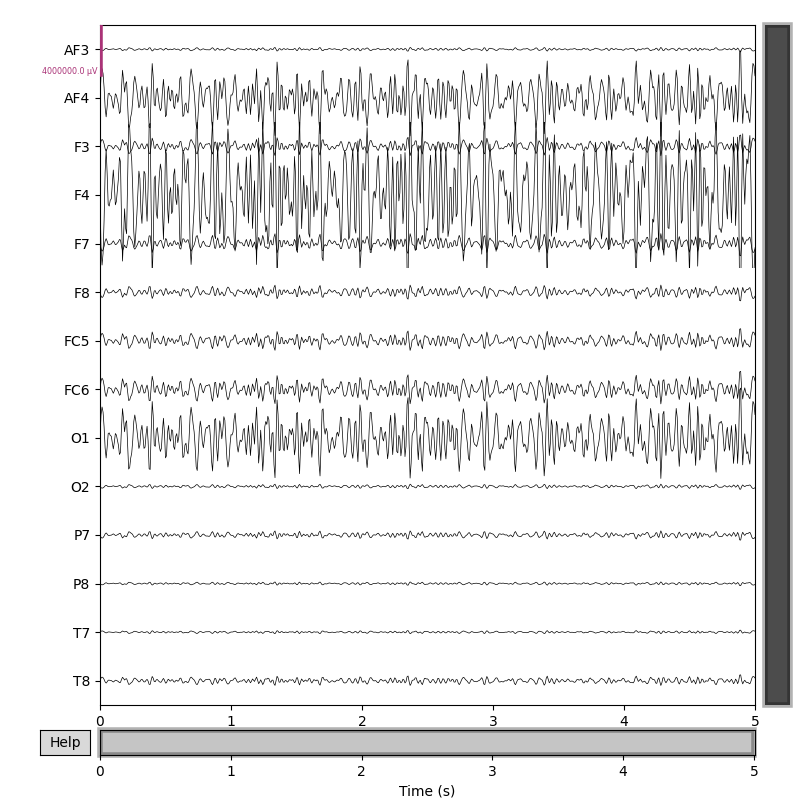

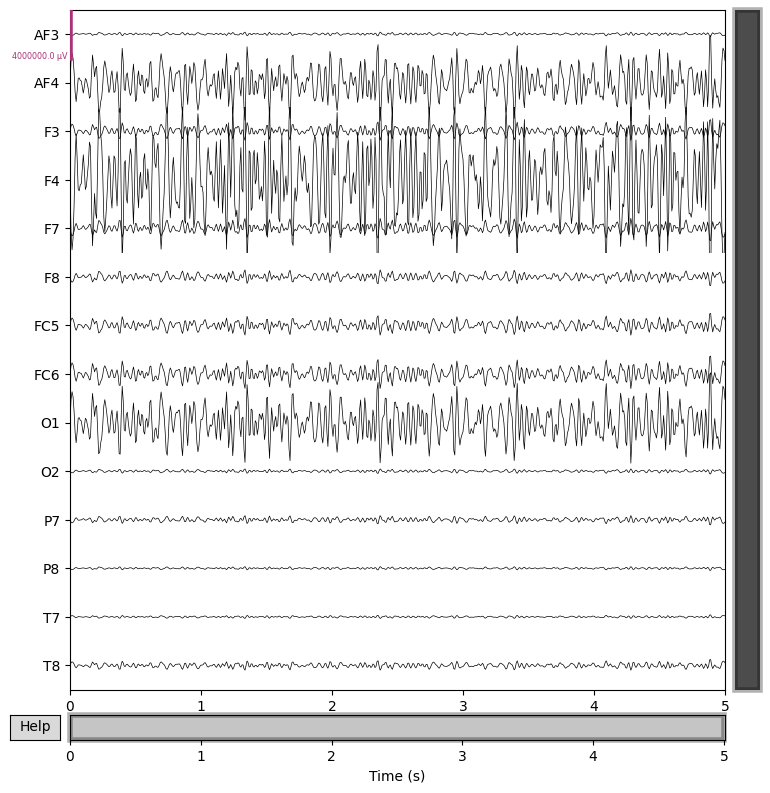

In [110]:
sub = 'S22'
game = 'G4'
data_psd = pd.read_csv(os.path.join(current_dir, sub, game, os.listdir(os.path.join(current_dir, sub, game))[0]))
signal_psd = data_psd[channels].T

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw_psd = mne.io.RawArray(signal_psd, info)
raw_psd.plot(scalings={'eeg': 2e0}, show=True, block=False)

Creating RawArray with float64 data, n_channels=14, n_times=641
    Range : 0 ... 640 =      0.000 ...     5.000 secs
Ready.


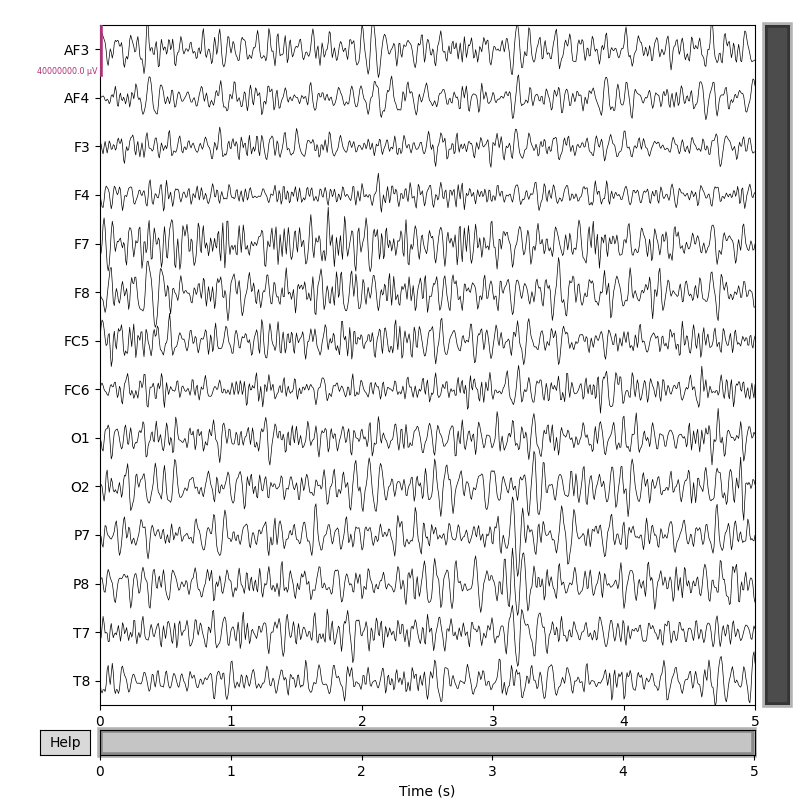

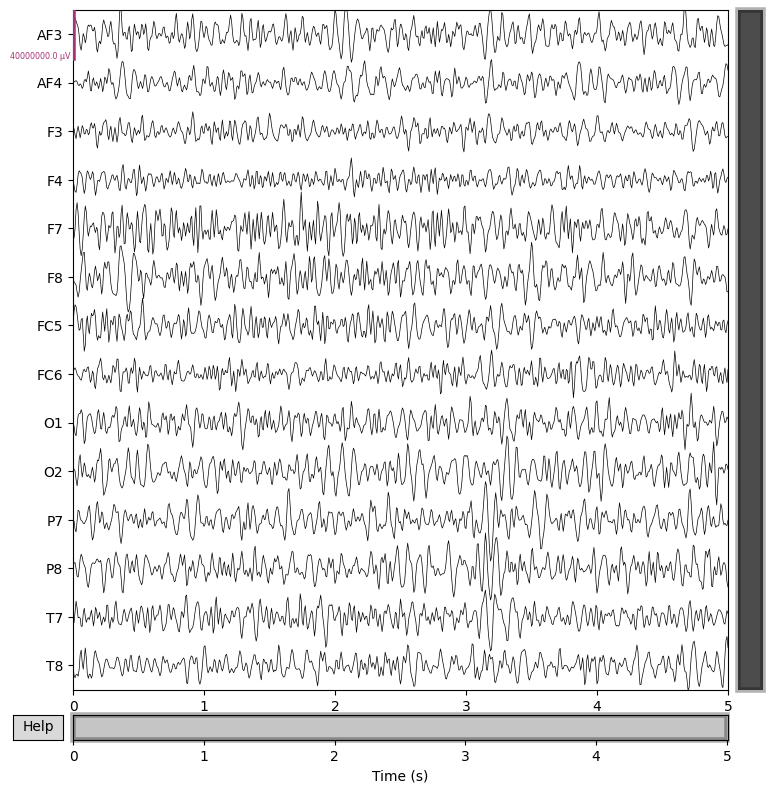

In [111]:
data_sample = pd.read_csv(os.path.join(epochs_folder, sub, game, os.listdir(os.path.join(epochs_folder, sub, game))[0]))
signal_sample = data_sample[channels].T

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw_sample = mne.io.RawArray(signal_sample, info)
raw_sample.plot(scalings={'eeg': 2e1}, show=True, block=False)

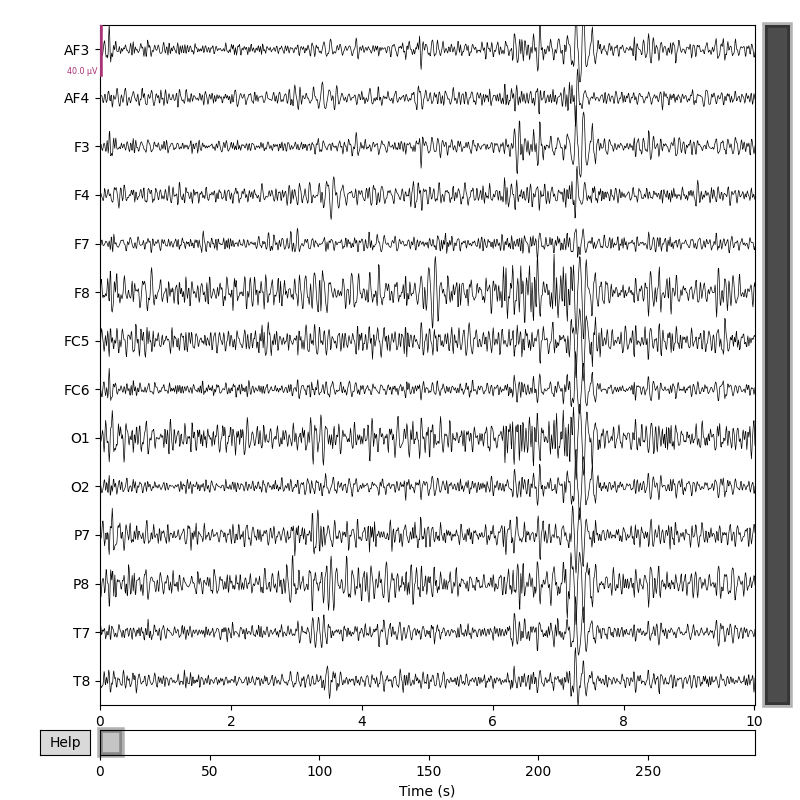

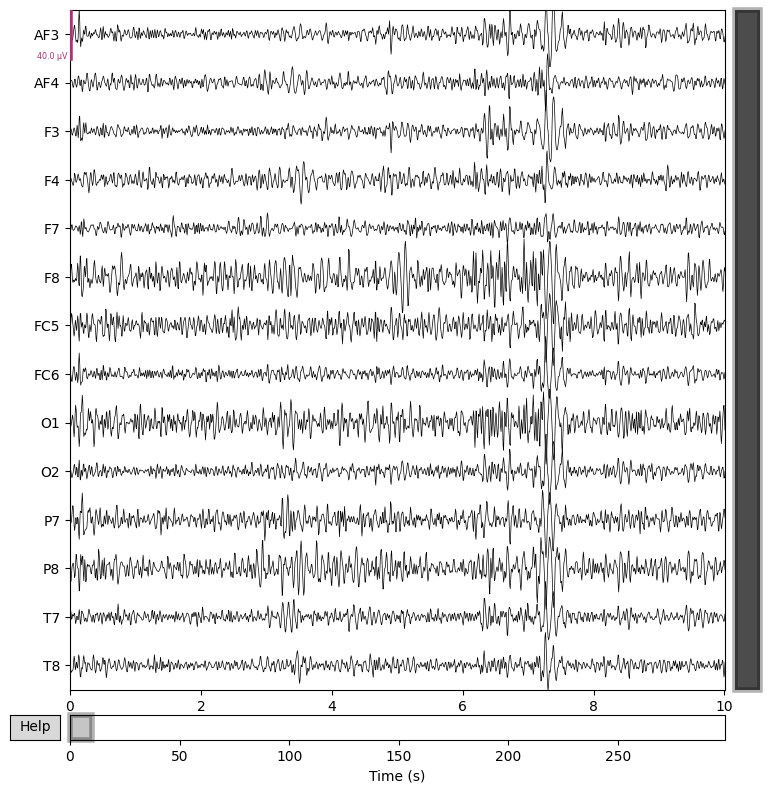

In [25]:
raw_clean.plot(scalings={'eeg': 2e-5}, show=True, block=False)